In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
import seaborn

import geopandas as gpd
from shapely.geometry import Point

data1=pd.read_csv("merged_data/all_data.csv")
del data1['Unnamed: 0']
data1.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


,zipcode,streets_sidewalks311_before,streets_sidewalks311_after,home311_before,home311_after,noise311_before,noise311_after,transportation311_before,transportation311_after,public_health_safety311_before,...,privateVehicle_change_abs,privateVehicle_change_rate,population,area,pv_change_area,sub_change_area,yel_change_area,pv_change_pop,sub_change_pop,yel_change_pop
0,10001,193.33,210.00,59.88,72.00,299.33,519.00,26.0,69.0,38.0,...,-3.204974e+06,-0.300808,22413.0,1.779494e+07,-0.180106,-0.833415,-0.180148,-142.996226,-661.695132,-143.029812
1,10002,277.00,378.33,200.00,215.88,1017.00,1923.00,196.5,164.5,117.0,...,-9.167520e+05,-0.284282,81305.0,2.628013e+07,-0.034884,0.027568,-0.041974,-11.275469,8.910916,-13.567298
2,10003,242.33,268.00,141.38,122.25,682.00,1040.67,46.0,50.5,88.0,...,-3.170385e+06,-0.340484,55878.0,1.553838e+07,-0.204036,-0.372674,-0.251884,-56.737629,-103.631984,-70.043225
3,10004,88.33,62.33,4.12,4.12,22.00,29.67,52.0,26.5,5.5,...,-1.319110e+05,-0.178989,2187.0,4.002521e+06,-0.032957,2.800295,-0.037920,-60.315974,5124.938272,-69.399126
4,10004,88.33,62.33,4.12,4.12,22.00,29.67,52.0,26.5,5.5,...,-1.319110e+05,-0.178989,2187.0,1.202708e+06,-0.109678,9.319172,-0.126195,-60.315974,5124.938272,-69.399126


In [2]:
index_c = pd.read_csv('merged_data/index.csv')
del index_c['Unnamed: 0']

In [3]:
index_c = index_c[['Zip','business_renewal','count_new_buildings','rent_increase']]

In [4]:
index_c['rent_increase'] = index_c['rent_increase']-1
index_c.columns = ['zipcode','business_renewal','count_new_buildings','rent_increase']

In [5]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

In [6]:
data1.columns

Index(['zipcode', 'streets_sidewalks311_before', 'streets_sidewalks311_after',
       'home311_before', 'home311_after', 'noise311_before', 'noise311_after',
       'transportation311_before', 'transportation311_after',
       'public_health_safety311_before', 'public_health_safety311_after',
       'vehicles_parking311_before', 'vehicles_parking311_after',
       'master_card_before', 'master_card_after', 'drugs_before',
       'drugs_after', 'petit_larceny_before', 'petit_larceny_after',
       'robbery_before', 'robbery_after', 'private_vehicles_before',
       'private_vehicles_after', 'subway_before', 'subway_after',
       'yellow_taxi_before', 'yellow_taxi_after', 'renovation_index',
       'renovation_index_with_rent', 'drug_change_abs', 'drug_change_rate',
       'petit_larceny_change_abs', 'petit_larceny_change_rate',
       'robbery_change_abs', 'robbery_change_rate', 'SS_change_rate',
       'H_change_rate', 'N_change_rate', 'T_change_rate', 'PHS_change_rate',
       'VP_ch

In [23]:
df = data1[['zipcode','drug_change_abs', 'drug_change_rate',
       'petit_larceny_change_abs', 'petit_larceny_change_rate',
       'robbery_change_abs', 'robbery_change_rate', 'SS_change_rate',
       'H_change_rate', 'N_change_rate', 'T_change_rate', 'PHS_change_rate',
       'VP_change_rate', 'SS_change_pop', 'H_change_pop', 'N_change_pop',
       'T_change_pop', 'PHS_change_pop', 'VP_change_pop', 'SS_change_area',
       'H_change_area', 'N_change_area', 'T_change_area', 'PHS_change_area',
       'VP_change_area', 'MasterCard_growth_rank', 'subway_change_abs',
       'subway_change_rate', 'yellowTaxi_change_abs', 'yellowTaxi_change_rate',
       'privateVehicle_change_abs', 'privateVehicle_change_rate', 'population',
       'area', 'pv_change_area', 'sub_change_area', 'yel_change_area',
       'pv_change_pop', 'sub_change_pop', 'yel_change_pop']]

In [24]:
df = df.fillna(0)

## Clustering analysis -- absolute change and %change in Crimes

For n_clusters = 2 The axverage silhouette_score is : 0.878197719119
For n_clusters = 3 The axverage silhouette_score is : 0.657517032135
For n_clusters = 4 The axverage silhouette_score is : 0.432655610639
For n_clusters = 5 The axverage silhouette_score is : 0.45136122926
For n_clusters = 6 The axverage silhouette_score is : 0.369939911777


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


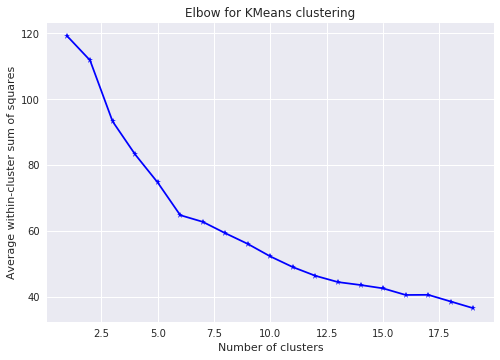

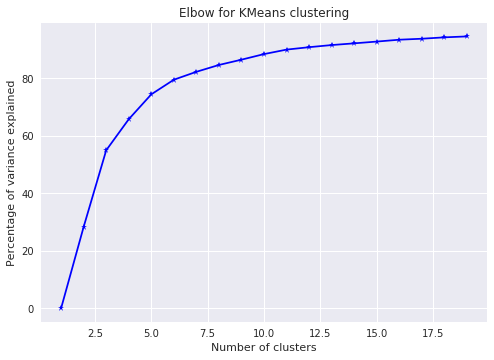

In [87]:
X=np.asarray(df.iloc[:,1:7])
range_n_clusters = [2, 3, 4, 5, 6]


for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The axverage silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
#elbow
elbow(X,range(1,20))

In [88]:
#2 is the optimal number of clusters

n=2 # number of clusters.

# Guassian Mixture:
# from sklearn.mixture import GaussianMixture
# GM=GaussianMixture(n_components=n)
# GM.fit(df.iloc[:,1:])
# res_Mix=GM.predict(df.iloc[:,1:])

#Kmeans
import sklearn.cluster as cluster
KM=cluster.KMeans(n_clusters=n)# claster=4
KM.fit(X)
res_KM=KM.predict(X)

#merge the result with zipcodes for graph plotting
#res_Mix=pd.concat((data1.loc[:,'zipcode'],pd.DataFrame(res_Mix)),axis=1)
res_KM=pd.concat((df.loc[:,'zipcode'],pd.DataFrame(data={'cluster_crime':res_KM})),axis=1)
res_KM.head()

,zipcode,cluster_crime
0,10001,1
1,10002,0
2,10003,0
3,10004,0
4,10004,0


In [89]:
data2 = pd.merge(res_KM,data1[['zipcode','renovation_index_with_rent']],on ='zipcode')

In [90]:
data2 = pd.merge(data2,index_c,on='zipcode')
data2 = data2.drop_duplicates('zipcode')
data2.head()

,zipcode,cluster_crime,renovation_index_with_rent,business_renewal,count_new_buildings,rent_increase
0,10001,1,12.446914,0.533825,852.0,0.117905
1,10002,0,10.818387,0.473819,559.0,0.128549
2,10003,0,6.758775,0.420635,207.0,0.165324
3,10004,0,9.302646,0.496063,45.0,0.160638
19,10005,0,8.584642,0.388889,3.0,0.109913


In [91]:
data2.groupby('cluster_crime').zipcode.count()

cluster_crime
0    179
1      1
Name: zipcode, dtype: int64

### The number of records to second cluster is too low, therefore doing clustering for crime metrics is unnecessary

## Clustering analysis -- absolute change and %change in 311 complaints

For n_clusters = 2 The axverage silhouette_score is : 0.862662230512
For n_clusters = 3 The axverage silhouette_score is : 0.87279871436
For n_clusters = 4 The axverage silhouette_score is : 0.868550891223
For n_clusters = 5 The axverage silhouette_score is : 0.270363468813
For n_clusters = 6 The axverage silhouette_score is : 0.281094395796


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


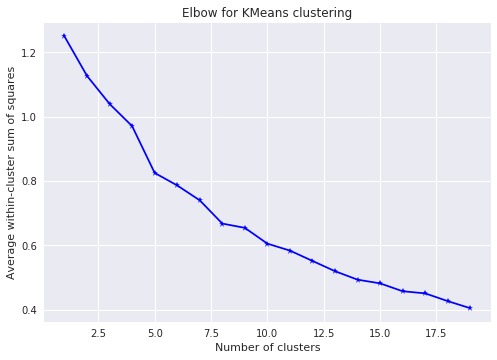

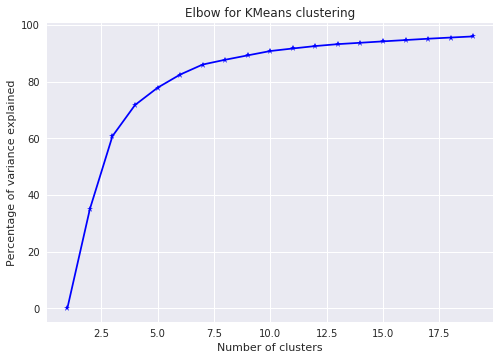

In [168]:
X=np.asarray(df.iloc[:,8:12])
range_n_clusters = [2, 3, 4, 5, 6]


for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The axverage silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
#elbow
elbow(X,range(1,20))

In [170]:
#2 is the optimal number of clusters

n=3 # number of clusters.

# Guassian Mixture:
# from sklearn.mixture import GaussianMixture
# GM=GaussianMixture(n_components=n)
# GM.fit(df.iloc[:,1:])
# res_Mix=GM.predict(df.iloc[:,1:])

#Kmeans
import sklearn.cluster as cluster
KM=cluster.KMeans(n_clusters=n)# claster=4
KM.fit(X)
res_KM=KM.predict(X)

#merge the result with zipcodes for graph plotting
#res_Mix=pd.concat((data1.loc[:,'zipcode'],pd.DataFrame(res_Mix)),axis=1)
res_KM=pd.concat((df.loc[:,'zipcode'],pd.DataFrame(data={'cluster_311':res_KM})),axis=1)
res_KM.head()

,zipcode,cluster_311
0,10001,0
1,10002,0
2,10003,0
3,10004,0
4,10004,0


In [171]:
data2 = pd.merge(data2,res_KM,on='zipcode')
data2 = data2.drop_duplicates('zipcode')
data2.head()

,zipcode,cluster_crime,renovation_index_with_rent,business_renewal,count_new_buildings,rent_increase,mastercard,transp_x,transp_norm,transp_y,cluster_311
0,10001,1,12.446914,0.533825,852.0,0.117905,1,0,0,0,0
1,10002,0,10.818387,0.473819,559.0,0.128549,0,0,0,0,0
2,10003,0,6.758775,0.420635,207.0,0.165324,1,0,0,0,0
3,10004,0,9.302646,0.496063,45.0,0.160638,0,0,1,0,0
7,10005,0,8.584642,0.388889,3.0,0.109913,1,0,0,0,0


In [172]:
data2.groupby('cluster_311').zipcode.count()

cluster_311
0    176
1      1
2      3
Name: zipcode, dtype: int64

### The numbers of records of second and third cluster are too low, therefore doing clustering for unnormalized 311 complaint metrics is unnecessary.

## Clustering analysis -- Normalized absolute change in 311 complaints (per sq mile or per capita)

For n_clusters = 2 The axverage silhouette_score is : 0.472215892366
For n_clusters = 3 The axverage silhouette_score is : 0.50298192144
For n_clusters = 4 The axverage silhouette_score is : 0.456265720292
For n_clusters = 5 The axverage silhouette_score is : 0.284057966882
For n_clusters = 6 The axverage silhouette_score is : 0.337452186382


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


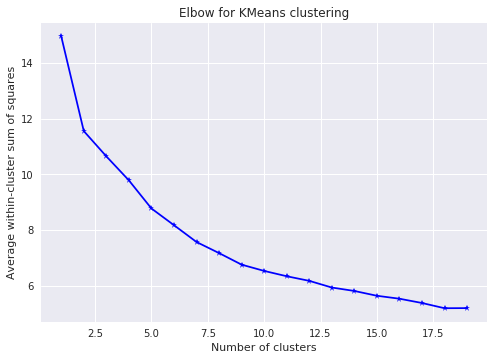

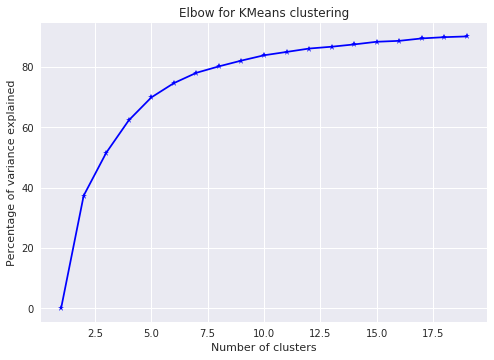

In [176]:
X=np.asarray(df.iloc[:,13:25])
range_n_clusters = [2, 3, 4, 5, 6]


for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The axverage silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
#elbow
elbow(X,range(1,20))

In [183]:
#2 is the optimal number of clusters

n=2 # number of clusters.

# Guassian Mixture:
# from sklearn.mixture import GaussianMixture
# GM=GaussianMixture(n_components=n)
# GM.fit(df.iloc[:,1:])
# res_Mix=GM.predict(df.iloc[:,1:])

#Kmeans
import sklearn.cluster as cluster
KM=cluster.KMeans(n_clusters=n)# claster=4
KM.fit(X)
res_KM=KM.predict(X)

#merge the result with zipcodes for graph plotting
#res_Mix=pd.concat((data1.loc[:,'zipcode'],pd.DataFrame(res_Mix)),axis=1)
res_KM=pd.concat((df.loc[:,'zipcode'],pd.DataFrame(data={'cluster_311_norm':res_KM})),axis=1)
res_KM.head()

,zipcode,cluster_311_norm
0,10001,0
1,10002,1
2,10003,1
3,10004,0
4,10004,0


In [184]:
data2 = pd.merge(data2,res_KM,on='zipcode')
data2 = data2.drop_duplicates('zipcode')
data2.head()

,zipcode,cluster_crime,renovation_index_with_rent,business_renewal,count_new_buildings,rent_increase,mastercard,transp_x,transp_norm,transp_y,cluster_311,cluster_311_norm
0,10001,1,12.446914,0.533825,852.0,0.117905,1,0,0,0,0,0
1,10002,0,10.818387,0.473819,559.0,0.128549,0,0,0,0,0,1
2,10003,0,6.758775,0.420635,207.0,0.165324,1,0,0,0,0,1
3,10004,0,9.302646,0.496063,45.0,0.160638,0,0,1,0,0,0
7,10005,0,8.584642,0.388889,3.0,0.109913,1,0,0,0,0,0


In [185]:
data2.groupby('cluster_311_norm').zipcode.count()

cluster_311_norm
0    142
1     38
Name: zipcode, dtype: int64

In [186]:
data2.groupby('cluster_311_norm').mean().reset_index().iloc[:,3:7]

,renovation_index_with_rent,business_renewal,count_new_buildings,rent_increase
0,24.976514,0.506460,531.690141,0.194872
1,27.883194,0.635272,462.052632,0.186042


### After we do clustering for abs change and %change for normalized 311 complaints, we got 2 clusters which show distinct average values in new/old business ratio.

## Clustering analysis -- Mastercard Grow score in 2017

For n_clusters = 2 The axverage silhouette_score is : 0.541841047976
For n_clusters = 3 The axverage silhouette_score is : 0.545007276966
For n_clusters = 4 The axverage silhouette_score is : 0.530378989243
For n_clusters = 5 The axverage silhouette_score is : 0.515348731922
For n_clusters = 6 The axverage silhouette_score is : 0.564829112227


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


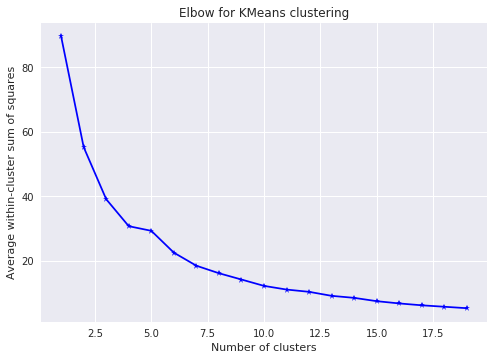

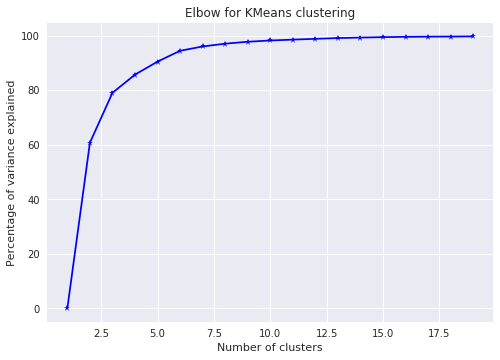

In [119]:
X=np.asarray(df.iloc[:,25:26])
range_n_clusters = [2, 3, 4, 5, 6]


for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The axverage silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
#elbow
elbow(X,range(1,20))

In [124]:
#2 is the optimal number of clusters

n=2 # number of clusters.

# Guassian Mixture:
# from sklearn.mixture import GaussianMixture
# GM=GaussianMixture(n_components=n)
# GM.fit(df.iloc[:,1:])
# res_Mix=GM.predict(df.iloc[:,1:])

#Kmeans
import sklearn.cluster as cluster
KM=cluster.KMeans(n_clusters=n)# claster=2
KM.fit(X)
res_KM=KM.predict(X)

#merge the result with zipcodes for graph plotting
#res_Mix=pd.concat((data1.loc[:,'zipcode'],pd.DataFrame(res_Mix)),axis=1)
res_KM=pd.concat((df.loc[:,'zipcode'],pd.DataFrame(data={'mastercard':res_KM})),axis=1)
res_KM.head()

,zipcode,mastercard
0,10001,1
1,10002,0
2,10003,1
3,10004,0
4,10004,0


In [125]:
data2 = pd.merge(data2,res_KM,on='zipcode')
data2 = data2.drop_duplicates('zipcode')
data2.head()

,zipcode,cluster_crime,renovation_index_with_rent,business_renewal,count_new_buildings,rent_increase,cluster_311,cluster_311_Norm,mastercard
0,10001,1,12.446914,0.533825,852.0,0.117905,0,0,1
1,10002,0,10.818387,0.473819,559.0,0.128549,0,1,0
2,10003,0,6.758775,0.420635,207.0,0.165324,0,1,1
3,10004,0,9.302646,0.496063,45.0,0.160638,0,0,0
7,10005,0,8.584642,0.388889,3.0,0.109913,0,0,1


In [126]:
data2.groupby('mastercard').zipcode.count()

mastercard
0     77
1    103
Name: zipcode, dtype: int64

In [127]:
data2.groupby('mastercard').mean().reset_index().iloc[:,3:7]

,renovation_index_with_rent,business_renewal,count_new_buildings,rent_increase
0,27.817157,0.596889,546.207792,0.197335
1,23.925294,0.486380,495.145631,0.189773


### After we do clustering for mastercard growth score, we got 2 clusters which show distinct average values in new/old business ratio

## Clustering analysis -- abs change and %change in yellow taxi, subway, private vehicle trips.

For n_clusters = 2 The axverage silhouette_score is : 0.926174768567
For n_clusters = 3 The axverage silhouette_score is : 0.770391967302
For n_clusters = 4 The axverage silhouette_score is : 0.795304455119
For n_clusters = 5 The axverage silhouette_score is : 0.663994046681
For n_clusters = 6 The axverage silhouette_score is : 0.502232793282


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


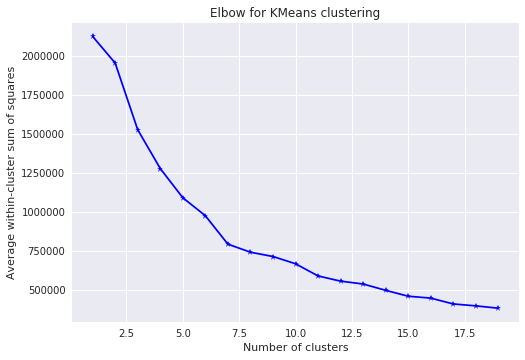

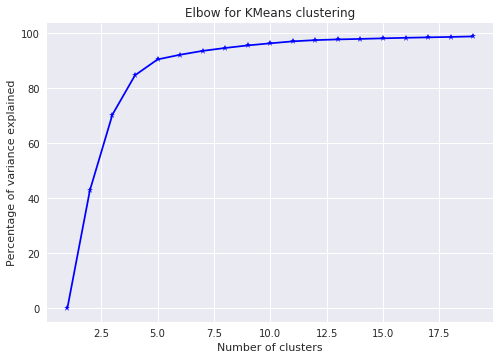

In [131]:
X=np.asarray(df.iloc[:,26:32])
range_n_clusters = [2, 3, 4, 5, 6]


for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The axverage silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
#elbow
elbow(X,range(1,20))

In [188]:
#2 is the optimal number of clusters

n=4 # number of clusters.

# Guassian Mixture:
# from sklearn.mixture import GaussianMixture
# GM=GaussianMixture(n_components=n)
# GM.fit(df.iloc[:,1:])
# res_Mix=GM.predict(df.iloc[:,1:])

#Kmeans
import sklearn.cluster as cluster
KM=cluster.KMeans(n_clusters=n)# claster=2
KM.fit(X)
res_KM=KM.predict(X)

#merge the result with zipcodes for graph plotting
#res_Mix=pd.concat((data1.loc[:,'zipcode'],pd.DataFrame(res_Mix)),axis=1)
res_KM=pd.concat((df.loc[:,'zipcode'],pd.DataFrame(data={'transp':res_KM})),axis=1)
res_KM.head()

,zipcode,transp
0,10001,0
1,10002,1
2,10003,1
3,10004,0
4,10004,0


In [189]:
data2 = pd.merge(data2,res_KM,on='zipcode')
data2 = data2.drop_duplicates('zipcode')
data2.head()

,zipcode,cluster_crime,renovation_index_with_rent,business_renewal,count_new_buildings,rent_increase,mastercard,transp_norm,cluster_311,cluster_311_norm,transp
0,10001,1,12.446914,0.533825,852.0,0.117905,1,0,0,0,0
1,10002,0,10.818387,0.473819,559.0,0.128549,0,0,0,1,1
2,10003,0,6.758775,0.420635,207.0,0.165324,1,0,0,1,1
3,10004,0,9.302646,0.496063,45.0,0.160638,0,1,0,0,0
7,10005,0,8.584642,0.388889,3.0,0.109913,1,0,0,0,0


In [190]:
data2.groupby('transp').zipcode.count()

transp
0    130
1     46
2      3
3      1
Name: zipcode, dtype: int64

In [193]:
data2.groupby('transp').mean().iloc[:,2:6].reset_index()

,transp,renovation_index_with_rent,business_renewal,count_new_buildings,rent_increase
0,0,24.522016,0.495468,521.261538,0.196496
1,1,29.407053,0.625707,542.108696,0.179876
2,2,15.091158,0.845353,57.333333,0.253405
3,3,20.366328,0.328125,185.000000,0.162403


### After we do clustering for abs change and %change for unnormalized transporation data, we got 2 clusters which show distinct average values in new/old business ratio. (cluster 2 and 3 can be ignored due to minimum records)

## Clustering analysis -- Normalized absolute change in yellow taxi, subway, private transportation (per sq mile or per capita)

In [152]:
# del data2['all_x']
# del data2['all_y']

For n_clusters = 2 The axverage silhouette_score is : 0.971412521983
For n_clusters = 3 The axverage silhouette_score is : 0.947196767797
For n_clusters = 4 The axverage silhouette_score is : 0.888277415891
For n_clusters = 5 The axverage silhouette_score is : 0.860479394711
For n_clusters = 6 The axverage silhouette_score is : 0.864374905123


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


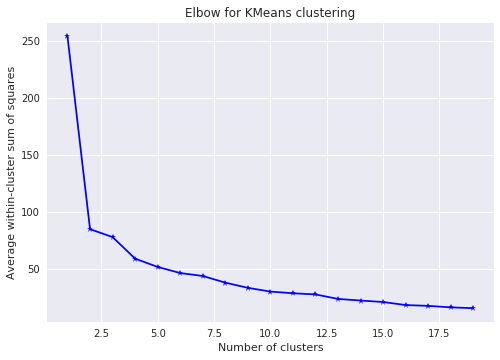

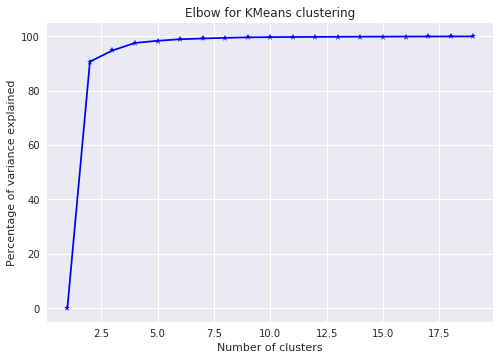

In [136]:
X=np.asarray(df.iloc[:,34:])
range_n_clusters = [2, 3, 4, 5, 6]


for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The axverage silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
#elbow
elbow(X,range(1,20))

In [137]:
#2 is the optimal number of clusters

n=2 # number of clusters.

# Guassian Mixture:
# from sklearn.mixture import GaussianMixture
# GM=GaussianMixture(n_components=n)
# GM.fit(df.iloc[:,1:])
# res_Mix=GM.predict(df.iloc[:,1:])

#Kmeans
KM=cluster.KMeans(n_clusters=n)# claster=2
KM.fit(X)
res_KM=KM.predict(X)

#merge the result with zipcodes for graph plotting
#res_Mix=pd.concat((data1.loc[:,'zipcode'],pd.DataFrame(res_Mix)),axis=1)
res_KM=pd.concat((df.loc[:,'zipcode'],pd.DataFrame(data={'transp_norm':res_KM})),axis=1)
res_KM.head()

,zipcode,transp_norm
0,10001,0
1,10002,0
2,10003,0
3,10004,1
4,10004,1


In [138]:
data2 = pd.merge(data2,res_KM,on='zipcode')
data2 = data2.drop_duplicates('zipcode')
data2.head()

,zipcode,cluster_crime,renovation_index_with_rent,business_renewal,count_new_buildings,rent_increase,cluster_311,cluster_311_Norm,mastercard,transp,transp_norm
0,10001,1,12.446914,0.533825,852.0,0.117905,0,0,1,0,0
1,10002,0,10.818387,0.473819,559.0,0.128549,0,1,0,0,0
2,10003,0,6.758775,0.420635,207.0,0.165324,0,1,1,0,0
3,10004,0,9.302646,0.496063,45.0,0.160638,0,0,0,0,1
7,10005,0,8.584642,0.388889,3.0,0.109913,0,0,1,0,0


In [140]:
data2.groupby('transp_norm').zipcode.count()

transp_norm
0    179
1      1
Name: zipcode, dtype: int64

### Due to low records in second cluster, there is no need to do clustering for this metric

## Clustering analysis - All metrics

For n_clusters = 2 The axverage silhouette_score is : 0.840057116664
For n_clusters = 3 The axverage silhouette_score is : 0.588929592945
For n_clusters = 4 The axverage silhouette_score is : 0.569380891351
For n_clusters = 5 The axverage silhouette_score is : 0.564863778445
For n_clusters = 6 The axverage silhouette_score is : 0.528427412056


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


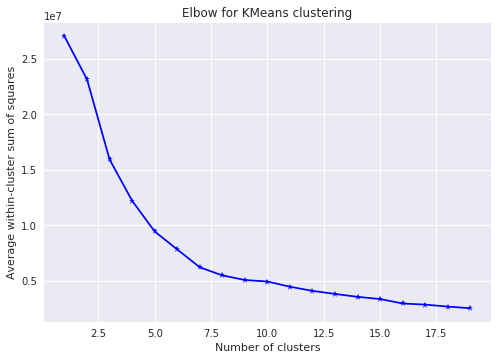

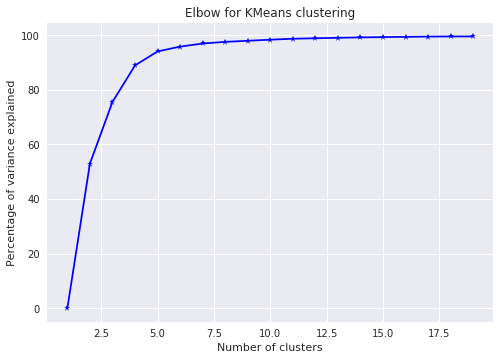

In [195]:
X=np.asarray(df.iloc[:,1:])
range_n_clusters = [2, 3, 4, 5, 6]


for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The axverage silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
#elbow
elbow(X,range(1,20))

In [196]:
#2 is the optimal number of clusters

n=3 # number of clusters.

# Guassian Mixture:
# from sklearn.mixture import GaussianMixture
# GM=GaussianMixture(n_components=n)
# GM.fit(df.iloc[:,1:])
# res_Mix=GM.predict(df.iloc[:,1:])

#Kmeans
KM=cluster.KMeans(n_clusters=n)# claster=2
KM.fit(X)
res_KM=KM.predict(X)

#merge the result with zipcodes for graph plotting
#res_Mix=pd.concat((data1.loc[:,'zipcode'],pd.DataFrame(res_Mix)),axis=1)
res_KM=pd.concat((df.loc[:,'zipcode'],pd.DataFrame(data={'all':res_KM})),axis=1)
res_KM.head()

,zipcode,all
0,10001,2
1,10002,2
2,10003,2
3,10004,2
4,10004,2


In [197]:
data2 = pd.merge(data2,res_KM,on='zipcode')
data2 = data2.drop_duplicates('zipcode')
data2.head()

,zipcode,cluster_crime,renovation_index_with_rent,business_renewal,count_new_buildings,rent_increase,mastercard,transp_norm,cluster_311,cluster_311_norm,transp,all
0,10001,1,12.446914,0.533825,852.0,0.117905,1,0,0,0,0,2
1,10002,0,10.818387,0.473819,559.0,0.128549,0,0,0,1,1,2
2,10003,0,6.758775,0.420635,207.0,0.165324,1,0,0,1,1,2
3,10004,0,9.302646,0.496063,45.0,0.160638,0,1,0,0,0,2
7,10005,0,8.584642,0.388889,3.0,0.109913,1,0,0,0,0,2


In [198]:
data2.groupby('all').zipcode.count()

all
0     52
1      1
2    127
Name: zipcode, dtype: int64

In [199]:
data2.groupby('all').mean().iloc[:,2:6].reset_index()

,all,renovation_index_with_rent,business_renewal,count_new_buildings,rent_increase
0,0,20.800736,0.487209,707.384615,0.192122
1,1,7.344952,0.413124,1900.000000,0.068300
2,2,27.694828,0.553619,428.141732,0.194353


### After we do clustering for all metrics, we got 2 clusters which show distinct average values in gentrification index and # new buildings. (cluster 1 due to minimum records)

In [200]:
#read zipcode shape file, define a constant crs
zipcode = gpd.read_file('ZIP_CODE/ZIP_CODE_040114.shp')
zipcode = zipcode[['ZIPCODE','geometry','POPULATION','AREA']]
zipcode = zipcode.to_crs(epsg=4326)
crs = {'init' :'epsg:4326'}
zipcode['ZIPCODE'] = zipcode.ZIPCODE.astype('int')
data3 = pd.merge(zipcode,data2,left_on='ZIPCODE',right_on='zipcode')

In [201]:
data_gdf = pd.merge(zipcode,data1,left_on='ZIPCODE',right_on='zipcode')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


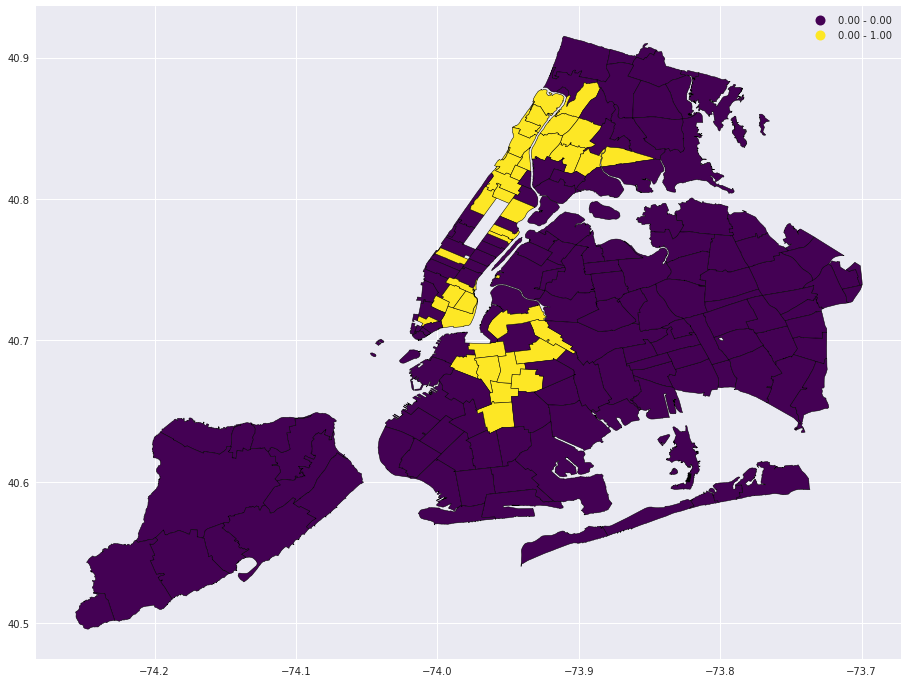

In [202]:
data3.plot(column = 'cluster_311_norm', figsize=(20,12), 
                 cmap='viridis',edgecolor = 'k', scheme='quantiles',lw = 0.5,legend=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


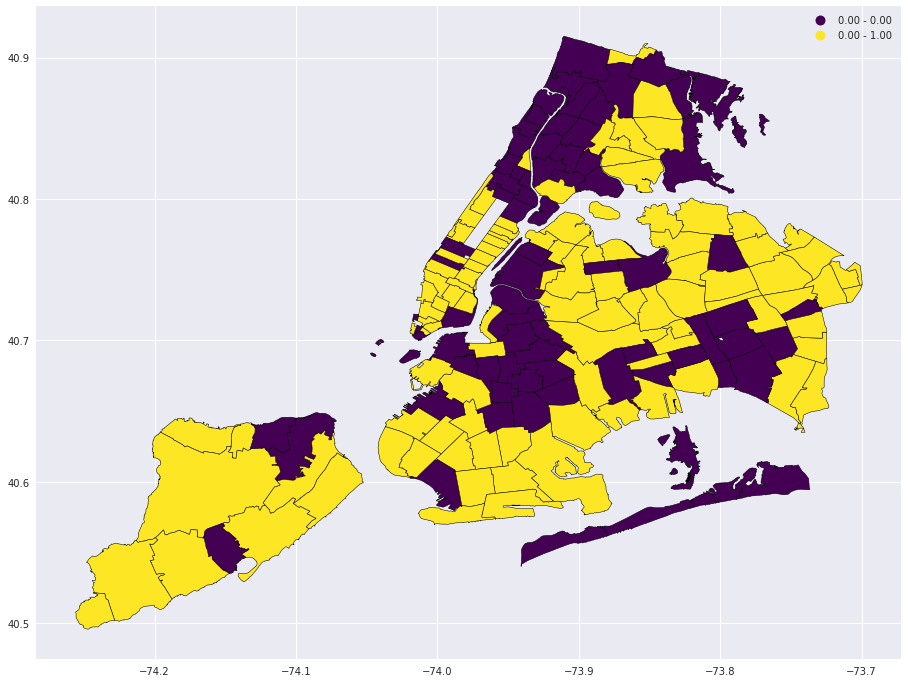

In [205]:
data3.plot(column = 'mastercard', figsize=(20,12), 
                 cmap='viridis',edgecolor = 'k', scheme='quantiles',lw = 0.5,legend=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


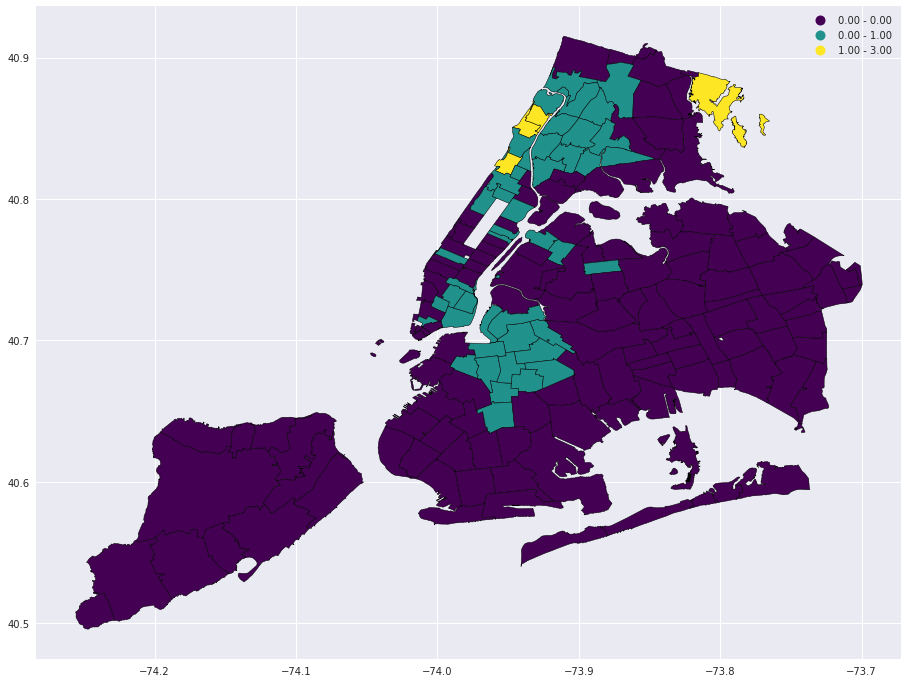

In [206]:
data3.plot(column = 'transp', figsize=(20,12), 
                 cmap='viridis',edgecolor = 'k', scheme='quantiles',lw = 0.5,legend=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


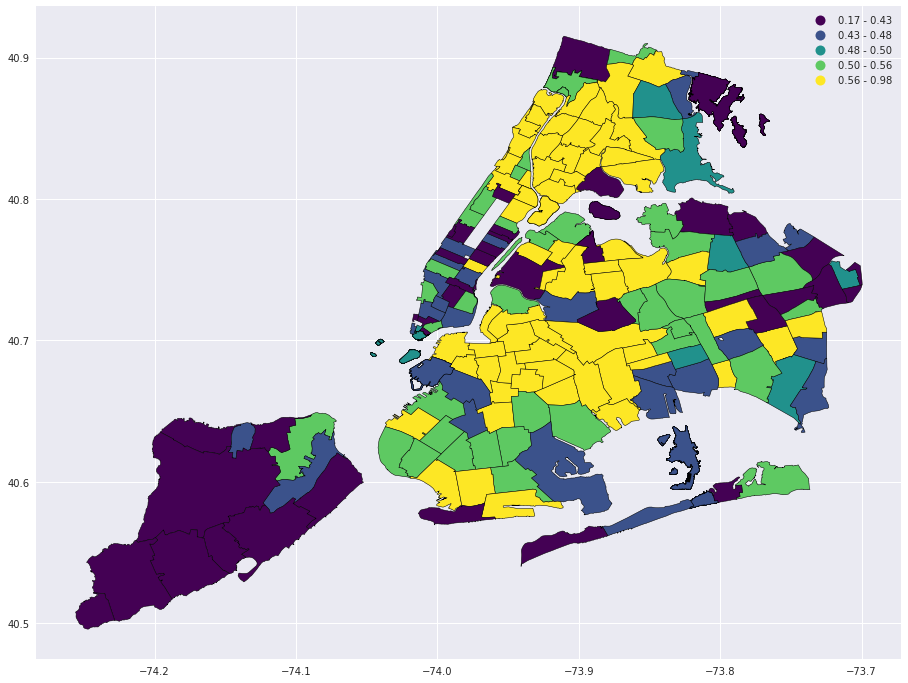

In [139]:
data3.plot(column = 'business_renewal', figsize=(20,12), 
                 cmap='viridis',edgecolor = 'k', scheme='quantiles',lw = 0.5,legend=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


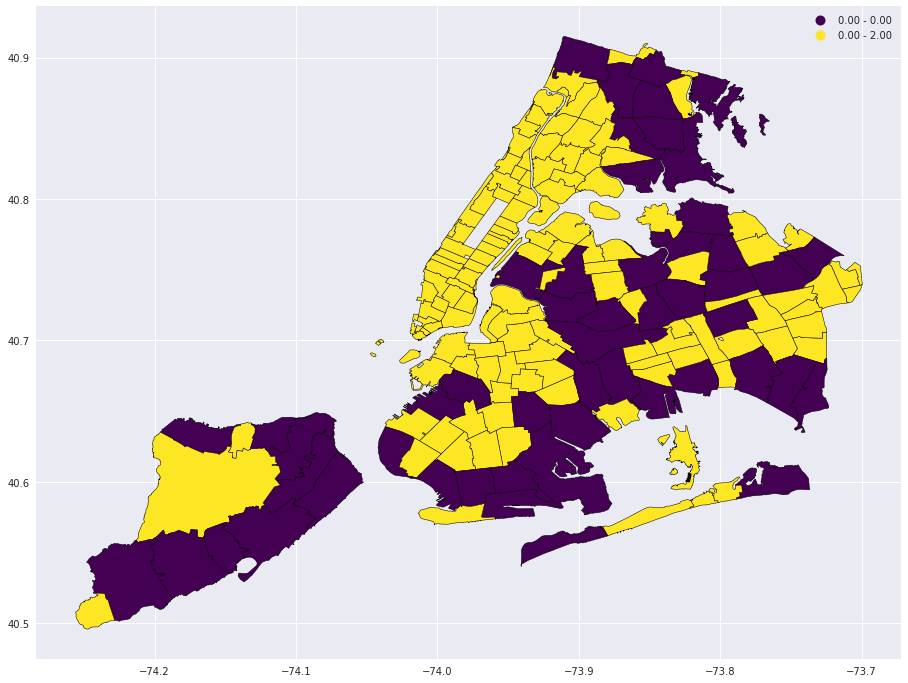

In [207]:
data3.plot(column = 'all', figsize=(20,12), 
                 cmap='viridis',edgecolor = 'k', scheme='quantiles',lw = 0.5,legend=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


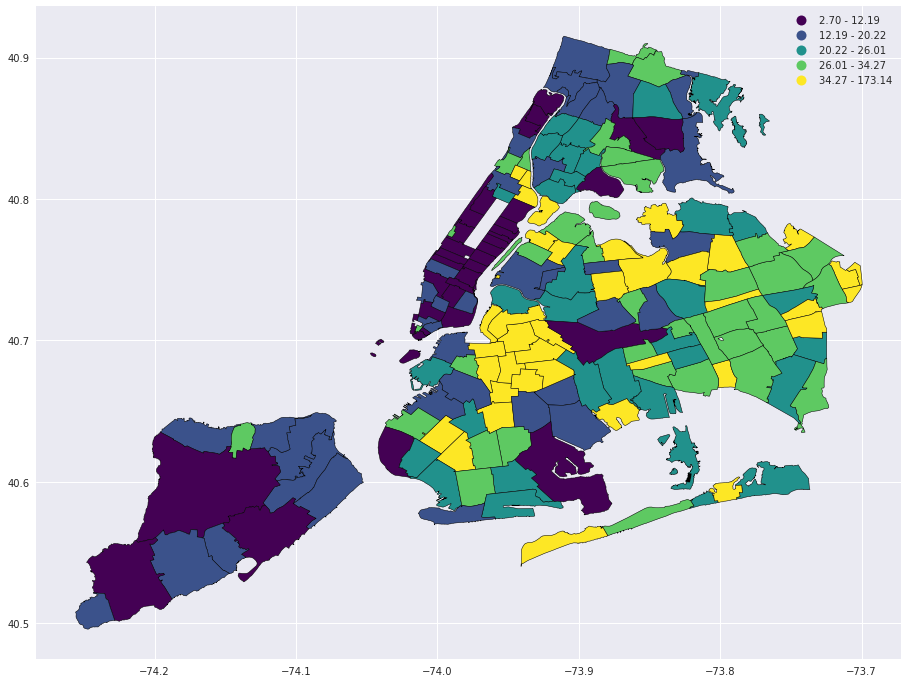

In [203]:
data3.plot(column = 'renovation_index_with_rent', figsize=(20,12), 
                 cmap='viridis',edgecolor = 'k', scheme='quantiles',lw = 0.5,legend=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


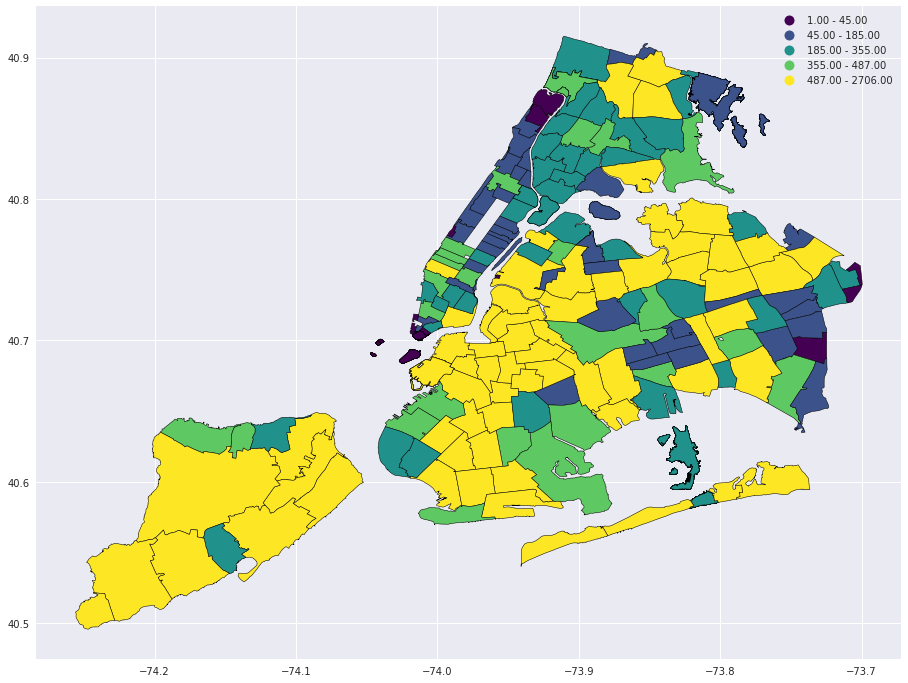

In [140]:
data3.plot(column = 'count_new_buildings', figsize=(20,12), 
                 cmap='viridis',edgecolor = 'k', scheme='quantiles',lw = 0.5,legend=True)